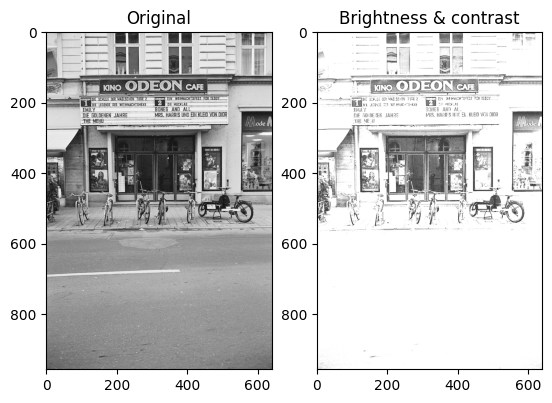

In [1]:
#Повышение яркости и контрастности исходного изображения
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Загрузка изображения
image = cv2.imread('Test.jpg')

#Построение графика исходного изображения
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Увеличение яркости изображения путем прибавления 10 единиц к каждому пикселю
brightness = 10
# Увеличение контрастности изображения путем масштабирования каждого участка изображения на 2.3 пункта
contrast = 2.3
image2 = cv2.addWeighted(image, contrast, np.zeros(image.shape, image.dtype), 0, brightness)

#Сохранение изображения
cv2.imwrite('modified_image.jpg', image2)
#Построение графика измененного изображения
plt.subplot(1, 2, 2)
plt.title("Brightness & contrast")
plt.imshow(image2)
plt.show()


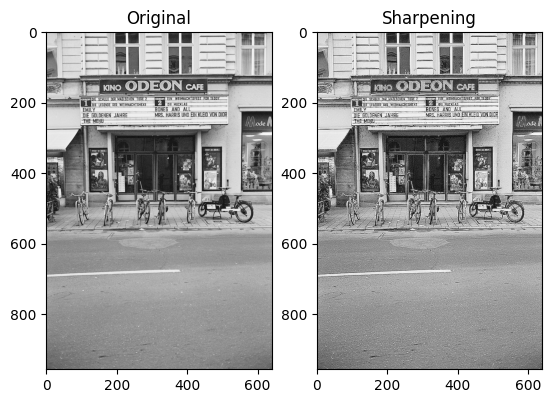

In [2]:
#Повышение резкости исходного изображения
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Загрузка изображения
image = cv2.imread('Test.jpg')

#Построение графика исходного изображения
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Создание ядра для повышения резкости
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Увеличение резкости изображения
sharpened_image = cv2.filter2D(image, -1, kernel)

# Сохранение изображения
cv2.imwrite('sharpened_image.jpg', sharpened_image)

# Сохранение изображения с увеличенной резкостью
plt.subplot(1, 2, 2)
plt.title("Sharpening")
plt.imshow(sharpened_image)
plt.show()


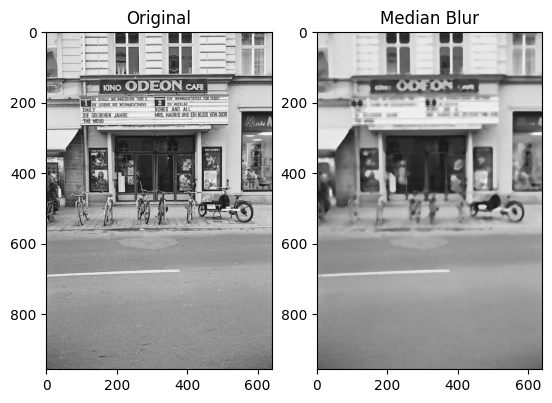

In [3]:
# Удаление шумов с изображения с помощью медианного фильтра
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Загрузка изображения
image = cv2.imread('Test.jpg')

# Построение графика исходного изображения
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Удаление шума с изображения с помощью медианного фильтра
filtered_image = cv2.medianBlur(image, 11)

# Сохранение изображения
cv2.imwrite('Median Blur.jpg', filtered_image)

# Сохранение изображения с уменьшенными шумами
plt.subplot(1, 2, 2)
plt.title("Median Blur")
plt.imshow(filtered_image)
plt.show()


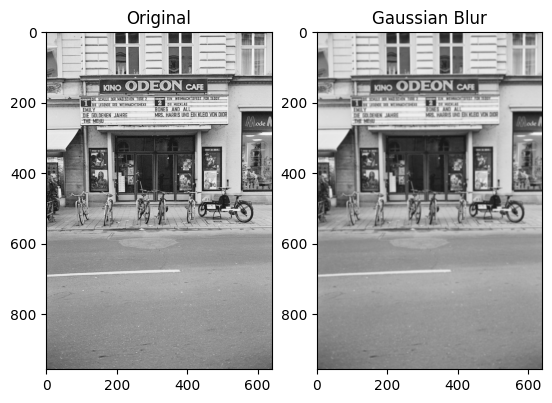

In [4]:
# Удаление шумов с изображения с помощью фильтра Гаусса
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Загрузка изображения
image = cv2.imread('Test.jpg')

# Построение графика исходного изображения
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Удаление шума с изображения с помощью фильтра Гаусса
filtered_image2 = cv2.GaussianBlur(image, (7, 7), 0)

# Сохранение изображения
cv2.imwrite('Gaussian Blur.jpg', filtered_image2)

# Сохранение изображения с уменьшенными шумами
plt.subplot(1, 2, 2)
plt.title("Gaussian Blur")
plt.imshow(filtered_image2)
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_2688\1685895987.py:11: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  f = scipy.misc.face(gray=True)


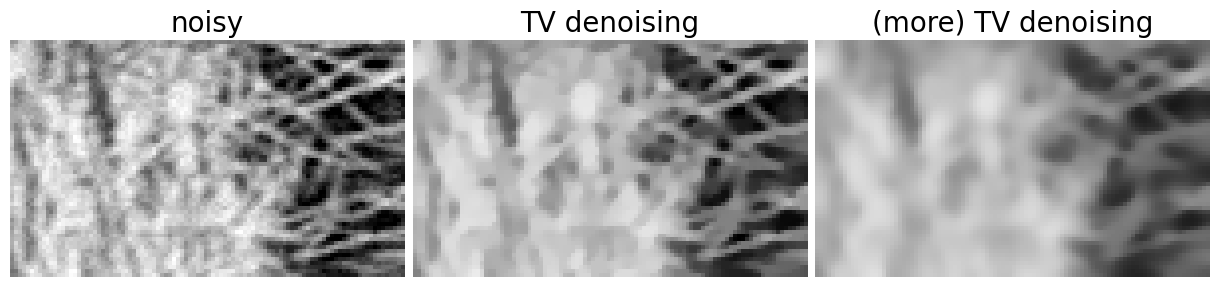

In [9]:
import numpy as np
import scipy
import scipy.misc
import matplotlib.pyplot as plt
try:
    from skimage.restoration import denoise_tv_chambolle
except ImportError:
    # skimage < 0.12
    from skimage.filters import denoise_tv_chambolle

f = scipy.misc.face(gray=True)
f = f[230:290, 220:320]

noisy = f + 0.4*f.std()*np.random.random(f.shape)

tv_denoised = denoise_tv_chambolle(noisy, weight=10)


plt.figure(figsize=(12, 2.8))

plt.subplot(131)
plt.imshow(noisy, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('noisy', fontsize=20)
plt.subplot(132)
plt.imshow(tv_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('TV denoising', fontsize=20)

tv_denoised = denoise_tv_chambolle(noisy, weight=50)
plt.subplot(133)
plt.imshow(tv_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('(more) TV denoising', fontsize=20)

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)
plt.show()

In [6]:
import numpy
import scipy
import scipy.misc
import matplotlib.pyplot as plt
def pmapWatershed(pmap, raw, visu=True, seedThreshold=0.6):

    viewGrayData = [(pmap, "pmap") ]
    viewLabelData= []



    print ("densoise")

    pmapD = denoise.tvBregman(pmap, weight=4.5, isotropic=True).astype(numpy.float32)
    pmapG = vigra.filters.gaussianSmoothing(pmap, 1.0)

    viewGrayData.append((pmapG, "pmapGauss"))
    viewGrayData.append((pmapD, "pmapTotalVariation"))
    viewGrayData.append((raw, "raw"))

    #addHocViewer(viewGrayData, viewLabelData, visu=visu)

    print ("compute local minima ")




    localMin = vigra.analysis.extendedLocalMinima3D(pmapD,neighborhood=26)
    localMin2 = localMin.astype(numpy.float32)

    print ("tweak min")
    localMin2 *= pmap



    whereZero = numpy.where(localMin == 0)
    localMin2[whereZero] = 100.0

    whereMin = numpy.where(localMin2 <= seedThreshold)

    filteredLocalMin = numpy.zeros(localMin.shape, dtype=numpy.uint8)
    filteredLocalMin[whereMin] = 1

    viewGrayData.append([localMin,"localMin"])
    viewGrayData.append([filteredLocalMin,"filteredLocalMin"])

    # compute connected components
    seeds = vigra.analysis.labelVolumeWithBackground(filteredLocalMin, neighborhood=26)

    viewLabelData.append([seeds, "seeds"])

    print ("watersheds")
    seg, nseg = vigra.analysis.watersheds(pmapG.astype(numpy.float32), seeds=seeds.astype(numpy.uint32))

    print ("nseg",nseg)


    viewLabelData.append([seg, "seg"])
    addHocViewer(viewGrayData, viewLabelData, visu=visu)

    return se